In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv1D, MaxPooling1D
from keras.layers import GlobalAveragePooling1D, LSTM, Flatten, Conv2D, Reshape

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

Using TensorFlow backend.


In [2]:
def get_data():
    
    try:
        X = np.load("data_arousal_physio_for_cnn.npy")
        Y = np.load("data_arousal_label_for_cnn.npy")
        return X, Y
    except:
        print "No stored files found.. load from files first"

In [3]:
X, Y = get_data()
print X.shape
print Y.shape

(402, 800, 24)
(402, 1)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f53a5dbdd50>]],
      dtype=object)

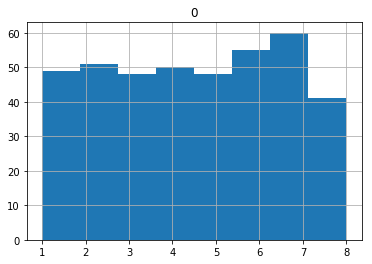

In [4]:
# collapse label 9 into 8
Y[Y==9] = 8
pd.DataFrame(Y).hist(bins=8)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f53a01ed490>]],
      dtype=object)

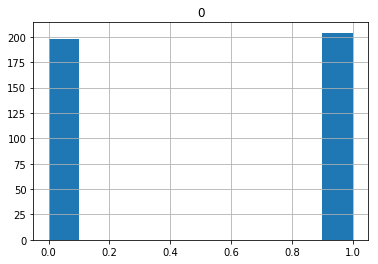

In [5]:
# binarize the problem
Y[Y<=4] = 0
Y[Y>=5] = 1
pd.DataFrame(Y).hist()

In [6]:
# Compute class weight
cw = class_weight.compute_class_weight('balanced', np.unique(Y), Y.flatten())
cw

array([1.01515152, 0.98529412])

In [7]:
# compute dummy variable
Y_dummy = keras.utils.to_categorical(Y)
Y_dummy.shape

(402, 2)

In [8]:
input_shape = (X.shape[1], X.shape[2])
n_classes = Y.shape[1]

def create_model():
    model = Sequential()
    model.add(Conv1D(64, 3, activation='relu', input_shape=input_shape))
    model.add(Conv1D(64, 3, activation='relu'))
    model.add(MaxPooling1D(3))
    model.add(Conv1D(128, 3, activation='relu'))
    model.add(Conv1D(128, 3, activation='relu'))
    model.add(GlobalAveragePooling1D())
    model.add(Dropout(0.5))
    model.add(Dense(n_classes, activation='sigmoid'))
    
    loss = keras.losses.binary_crossentropy
    metrics = ['accuracy']
    
    model.compile(loss=loss, optimizer='adam', metrics=metrics)
    return model

In [9]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=16, verbose=0)

# evaluate using 10-fold cross validation
cv = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(model, X, Y, cv=cv, verbose=1)

print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Instructions for updating:
Use tf.cast instead.
Accuracy: 46.05% (6.84%)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 14.0min finished
